In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%load_ext autoreload
%autoreload 2
import nlpUtils as nlpUtils
import plotUtils as pUtils

In [3]:
# read in saved dataframe containing chapter text
unpickled_df = pd.read_pickle("./sla_chapter_text.pkl")
unpickled_df

,chapter_text,book,chapter
0,prelud stormlight archiv kalak round rocki st...,1,1
1,love men frigid thing mountain stream three s...,1,2
2,kill bastard kill sun still hot die day week ...,1,3
3,ten order love forsaken us almighti shard sou...,1,4
4,man stood watch homeland fall dust water surg...,1,5
...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127
457,ye look forward rule human el ﬁrst final ten ...,4,128
458,nearli much look forward serv newest odium re...,4,129
459,fourteen month ago eshonai hit ground chasm f...,4,130


In [4]:
# define constants
numBooks = 4
numTopics = 7 # number of topics or clusters
low_doc_freq = 0.01
high_doc_freq = 0.75
do_LDA = False

In [5]:
# vectorize chapter text
vectorized_matrix, vectorizer = nlpUtils.vectorizeTextIDF(unpickled_df['chapter_text'], low_doc_freq, high_doc_freq) # for NMF and kMeans
if do_LDA: vectorized_matrix_noidf, vectorizer_noidf = nlpUtils.vectorizeText(unpickled_df['chapter_text'], low_doc_freq, high_doc_freq) # for LDA

In [6]:
# do NMF
doc_top_matrix, nmf_top_words = nlpUtils.doNMF(numTopics, vectorized_matrix, vectorizer)

# do kMeans clustering
doc_clusters, kMeans_top_words = nlpUtils.dokMeans(numTopics, vectorized_matrix, vectorizer)

# do LDA
if do_LDA: lda_doc_probs = nlpUtils.doLDA(numTopics, vectorized_matrix_noidf, vectorizer_noidf)


NMF Topic Words:
Topic 0: shallan jasnah veil pattern tyn balat
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar sadea navani vision gavilar parshendi
Topic 3: venli eshonai rhythm human attun rlain
Topic 4: adolin veil honorspren sadea duel spren
Topic 5: navani raboniel sibl tower fuse voidlight
Topic 6: szeth taravangian lash odium sword nin

kMeans Cluster Words:
Cluster 0: dalinar adolin navani sadea parshendi vision
Cluster 1: adolin shallan kaladin honorspren veil spren
Cluster 2: szeth kal lirin wit rysn moash
Cluster 3: shallan jasnah veil pattern tyn father
Cluster 4: navani raboniel taravangian sibl kaladin tower
Cluster 5: kaladin teft syl bridg moash dalinar
Cluster 6: venli eshonai rhythm human attun raboniel


In [7]:
# update dataframe with document topics and clusters
df_with_results = unpickled_df.copy()
df_with_results['NMF'] = doc_top_matrix[:].tolist() # put NMF vectors into df
df_with_results['NMF_Top_Topic'] = [np.asarray(values).argmax() for values in df_with_results['NMF']] # put best topic from NMF into df
df_with_results['kMeans'] = doc_clusters # put kMeans cluster number into df
if do_LDA: df_with_results['LDA'] = lda_doc_probs
df_with_results

,chapter_text,book,chapter,NMF,NMF_Top_Topic,kMeans
0,prelud stormlight archiv kalak round rocki st...,1,1,"[0.008486771954257625, 0.01189708753424381, 0....",6,2
1,love men frigid thing mountain stream three s...,1,2,"[0.0, 0.012200522956481797, 0.0, 0.0, 0.009798...",6,2
2,kill bastard kill sun still hot die day week ...,1,3,"[0.0, 0.17204039716144984, 0.01651304624321604...",1,5
3,ten order love forsaken us almighti shard sou...,1,4,"[0.021902594816247987, 0.22873524675422302, 0....",1,5
4,man stood watch homeland fall dust water surg...,1,5,"[0.18641509265583905, 0.012312633331427283, 0....",0,3
...,...,...,...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127,"[0.0, 0.09956632424424555, 0.04859395498445785...",6,4
457,ye look forward rule human el ﬁrst final ten ...,4,128,"[0.11065113101029128, 0.0, 0.0, 0.247062176506...",3,6
458,nearli much look forward serv newest odium re...,4,129,"[0.0, 0.14850877097739557, 0.19368713448147382...",2,5
459,fourteen month ago eshonai hit ground chasm f...,4,130,"[0.009430270056667934, 0.023145773603788763, 0...",3,6


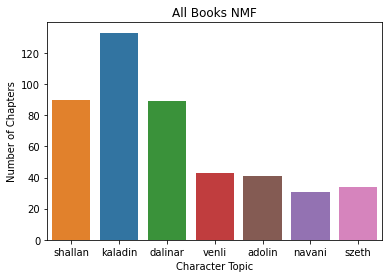

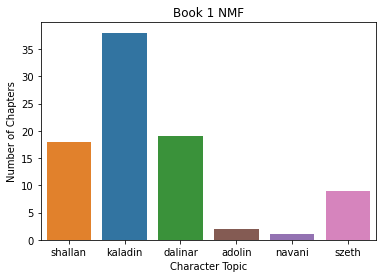

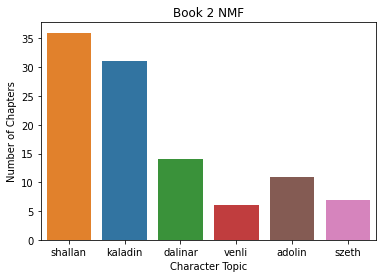

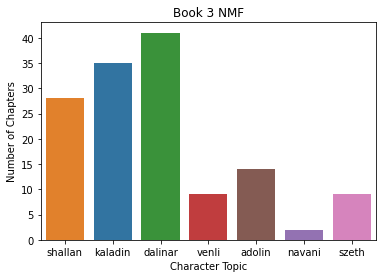

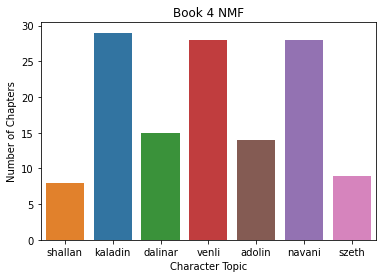

In [8]:
# look at topics or clusters versus book number

# kMeans
# for i in range(numBooks+1):
#     if i == 0 :
#         pUtils.getClusterCounts(df_with_results, kMeans_top_words, i)
#     else:
#         pUtils.getClusterCounts(df_with_results[df_with_results['book'] == i], kMeans_top_words, i)

        
# NMF (top topic)
for i in range(numBooks+1):
    if i == 0 :
        pUtils.getNMFCounts(df_with_results, nmf_top_words, i)
    else:
        pUtils.getNMFCounts(df_with_results[df_with_results['book'] == i], nmf_top_words, i)
     

breaking at iteration 206 with stress 10802.272497824946


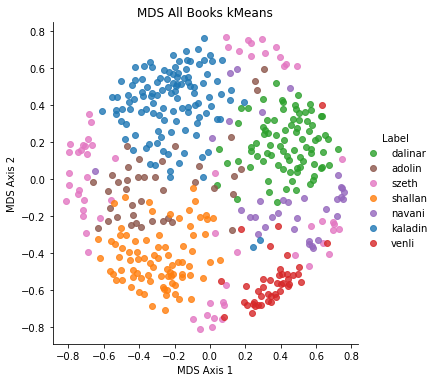

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.002s...
[t-SNE] Computed neighbors for 461 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 0.377606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.994423
[t-SNE] KL divergence after 1000 iterations: 0.626809


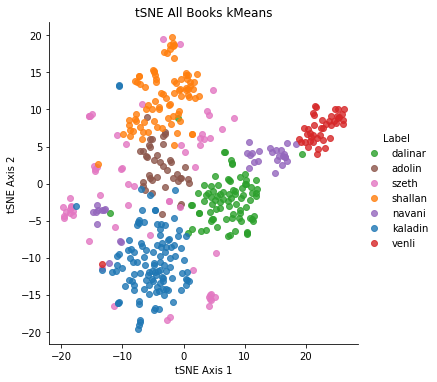

In [9]:
# dimensionality reduction plots
pUtils.makeMDSPlot(vectorized_matrix, df_with_results, kMeans_top_words)
pUtils.makeTSNEPlot(vectorized_matrix, df_with_results, kMeans_top_words, 50)

In [10]:
# make tSNE plot with different perplexities to compare them
# for perp in np.linspace(10,50,5):
#     pUtils.makeTSNEPlot(vectorized_matrix, df_with_results, kMeans_top_words, perp)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 461 samples in 0.009s...
[t-SNE] Computed neighbors for 461 samples in 0.246s...
[t-SNE] Computed conditional probabilities for sample 461 / 461
[t-SNE] Mean sigma: 1.752076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.898052
[t-SNE] KL divergence after 1000 iterations: 0.268811
['shallan', 'kaladin', 'dalinar', 'venli', 'adolin', 'navani', 'szeth']
   tSNE Axis 1  tSNE Axis 2  Topic    Label
0    -0.633950     1.885273      6    szeth
1     3.737173   -11.313167      6    szeth
2   -12.467199    -1.706155      1  kaladin
3   -13.746843    -0.673590      1  kaladin
4    -0.602149    12.053452      0  shallan


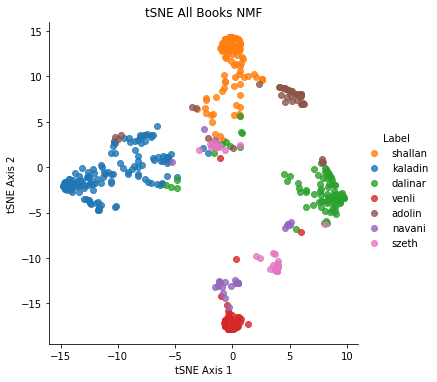

In [11]:
# make tSNE plot with NMF results
pUtils.makeTSNEPlotFromNMF(vectorized_matrix, df_with_results, nmf_top_words, 50)

In [12]:
# make tSNE plot with different perplexities to compare them (for NMF results)
# for perp in np.linspace(10,50,5):
#     pUtils.makeTSNEPlotFromNMF(vectorized_matrix, df_with_results, nmf_top_words, perp)

In [13]:
# now separate out the chapters for a specific character and do topic modeling/visualization/sentiment analysis on that

In [51]:
numSubTopics = [6, 6, 6, 6, 6, 5, 4] # this will get messed up if I change my original NMF in any way, and if I increase the number of topics from 7

for topic_num in range(numTopics):
        
    print('Character:', nmf_top_words[topic_num].capitalize())

    df_character = df_with_results[df_with_results['NMF_Top_Topic'] == topic_num]
    
    # topic modeling of only these character chapters

    char_vectorized_matrix, char_vectorizer = nlpUtils.vectorizeTextIDF(df_character['chapter_text'], low_doc_freq, high_doc_freq, True)
    char_doc_top_matrix, char_nmf_top_words = nlpUtils.doNMF(numSubTopics[topic_num], char_vectorized_matrix, char_vectorizer)
    
    print()


Character: Shallan

NMF Topic Words:
Topic 0: citi map illus stormlight soldier street
Topic 1: father tabl hous feast brother messeng
Topic 2: wagon caravan bandit desert ﬁre chull
Topic 3: soulcast jam book ardent bread bright
Topic 4: radiant spren spi shadesmar honorspren mission
Topic 5: ship bead captain sailor cabin deck

Character: Kaladin

NMF Topic Words:
Topic 0: king assassin sir shardblad guard blade
Topic 1: bridg bridgemen crew arrow parshendi barrack
Topic 2: pursuer fuse ﬂoor tower devic regal
Topic 3: father town surgeon mother boy son
Topic 4: citi fuse spren parshmen ship lash
Topic 5: chasm sphere chasmﬁend wall spear plateau

Character: Dalinar

NMF Topic Words:
Topic 0: king highprinc father island feast tabl
Topic 1: parshendi plateau bridg bridgemen armor gallant
Topic 2: vision stormfath radiant desol knight almighti
Topic 3: odium champion win coin fuse contract
Topic 4: rift thrill elit hors plate citi
Topic 5: citi oathgat thaylen azish spanre templ

Charac

In [15]:
# sentiment analysis stuff
# from textblob import TextBlob
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
# sid_obj = SentimentIntensityAnalyzer()

In [16]:
# for topic_num in range(numTopics):
# for topic_num in range(1):
    
#     print('Looking at character:', nmf_top_words[topic_num])

#     df_character = df_with_results[df_with_results['NMF_Top_Topic'] == topic_num]
    
#     # sentiment analysis tests of character dataframes

#     global_chapter_numbers = []
#     polarity_scores = []
#     vader_polarity_scores = []

#     for index, row in df_character.iterrows():
#         text_for_sentiment = TextBlob(row['chapter_text'])
#         polarity_scores.append(text_for_sentiment.sentiment.polarity)
#         global_chapter_numbers.append(index)
        
#         vader_polarity_scores.append(sid_obj.polarity_scores(row['chapter_text']))
        
#     print(vader_polarity_scores)

        
    
#     # get top chapters with lowest polarity scores
#     top_negative_scores_indices = np.asarray(polarity_scores).argsort()[:2][::]
    
#     for ind in top_negative_scores_indices:
#         print(global_chapter_numbers[ind]+1, polarity_scores[ind])
#         print(df_character.iloc[ind])
#         print()    

#     plot sentiment versus chapter number
#     sns.lineplot(x=global_chapter_numbers, y=polarity_scores)
#     plt.show()